## Однородные координаты. Преобразование фигуры

### Цель работы

1. Задать пятиугольник с произвольными координатами.
2. Осуществить следующие операции:
    * смещение,
    * масштабирование,
    * поворот на угол,
    * зеркальное отображение по одной из осей.

### Ход работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string # для именования точек

Координаты вершин пятиугольника:
https://www.mathopenref.com/coordpolycalc.html

In [2]:
shape = np.array([[0, -10], [-10, -3], [-6, 8], [6, 8], [10, -3]])

Функция для вывода многоугольника на экран. Можно передать исходную и изменённую фигуры, чтобы увидеть различия.

In [3]:
def print_shape(shape, changed_shape=shape):
    point_names = list(string.ascii_uppercase)[0:shape.shape[0]]
    
    shape = np.vstack([shape, shape[0]]) # для замыкания контура
    changed_shape = np.vstack([changed_shape, changed_shape[0]])
    
    plt.figure(figsize=(6, 6), dpi=80)
    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.plot(shape[:,0], shape[:,1], 'go-', linewidth=2, label='Shape')
    for i in range(len(point_names)): # именование вершин
        plt.annotate(point_names[i], (shape[i,0], shape[i,1]), textcoords="offset points", xytext=(0,7))
    
    if ((changed_shape != shape).any()):
        plt.plot(changed_shape[:,0], changed_shape[:,1], 'bo-', linewidth=2, label='New shape')
        for i in range(len(point_names)):
            plt.annotate(point_names[i] + '\'', (changed_shape[i,0], changed_shape[i,1]), textcoords="offset points", xytext=(0,7))

        for i in range(len(point_names)): # пунктирные линии разницы
            plt.plot([shape[i,0], changed_shape[i,0]], [shape[i,1], changed_shape[i,1]], 'k--', linewidth=1)

    plt.legend()
    plt.grid()
    

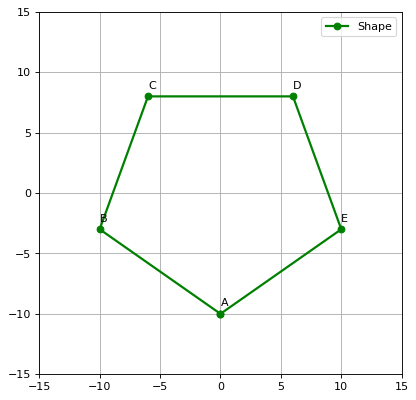

In [4]:
print_shape(shape)

#### 1. Смещение

Матрица преобразования содержит в себе константы $m$ и $n$, под действием которых точка смещается на $m$ единиц вдоль оси $x$ и на $n$ единиц — вдоль оси $y$:
$$
\begin{vmatrix}
x & y & 1
\end{vmatrix} \cdot
\begin{vmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
m & n & 1
\end{vmatrix} = 
\begin{vmatrix}
x+m & y+n & 1
\end{vmatrix}
$$

In [5]:
def move(shape, offset_x, offset_y):
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    offset_matrix = np.array([[1, 0, 0],
                             [0, 1, 0],
                             [offset_x, offset_y, 1]])
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(offset_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [6]:
new_shape = move(shape, 5, 5)

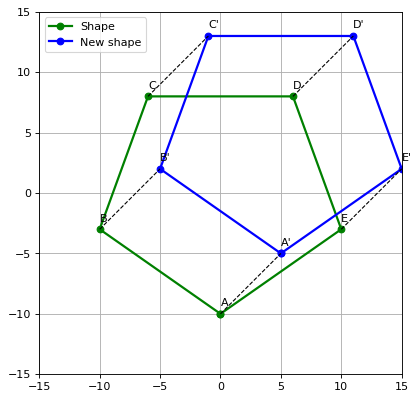

In [7]:
print_shape(shape, new_shape)

#### 2. Масштабирование

За счет коэффициентов $a$ и $d$ матрицы преобразования происходит увеличение (или уменьшение) значения координат точки $(x, y)$ в $a$ и $d$ раз по осям $x$ и $y$ соответственно:
$$
\begin{vmatrix}
x & y & 1
\end{vmatrix} \cdot
\begin{vmatrix}
a & 0 & 0\\
0 & d & 0\\
0 & 0 & 1
\end{vmatrix} = 
\begin{vmatrix}
ax & dy & 1
\end{vmatrix}
$$

In [8]:
def resize(shape, scale_x, scale_y):
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    resize_matrix = np.array([[scale_x, 0, 0],
                             [0, scale_y, 0],
                             [0, 0, 1]])
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(resize_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [9]:
new_shape = resize(shape, 1.5, 0.5)

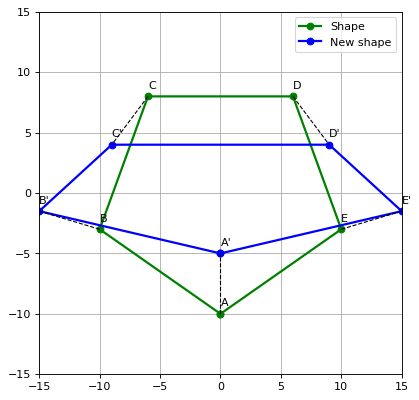

In [10]:
print_shape(shape, new_shape)

#### 3. Поворот на угол $\theta$

Здесь $\theta$ — угол, на который требуется повернуть точку $(x, y)$. 
Поворот происходит относительно точки $(0, 0)$ декартовой системы координат против часовой стрелки

$$
\begin{vmatrix}
x & y & 1
\end{vmatrix} \cdot
\begin{vmatrix}
cos\theta & sin\theta & 0\\
-sin\theta & cos\theta & 0\\
0 & 0 & 1
\end{vmatrix} = 
\begin{vmatrix}
x\cdot cos\theta - y\cdot sin\theta & x\cdot sin\theta + y\cdot cos\theta & 1
\end{vmatrix}
$$

In [11]:
def rotate(shape, angle):
    angle = np.deg2rad(angle) # конвертация из градусов в радианы
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    rotate_matrix = np.array([[np.cos(angle), np.sin(angle), 0],
                             [-np.sin(angle), np.cos(angle), 0],
                             [0, 0, 1]])
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(rotate_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [12]:
new_shape = rotate(shape, 45)

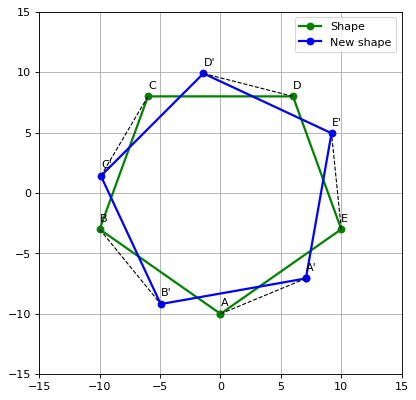

In [13]:
print_shape(shape, new_shape)

#### 4. Отображение или зеркалирование

Зеркалирование относительно прямой $y = x$:
$$
\begin{vmatrix}
x & y & 1
\end{vmatrix} \cdot
\begin{vmatrix}
0 & 1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{vmatrix} = 
\begin{vmatrix}
y & x & 1
\end{vmatrix}
$$

Зеркалирование относительно оси $y$ (т.е. прямой $x = 0$):
$$
\begin{vmatrix}
x & y & 1
\end{vmatrix} \cdot
\begin{vmatrix}
-1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{vmatrix} = 
\begin{vmatrix}
-x & y & 1
\end{vmatrix}
$$

Зеркалирование относительно оси $x$ (т.е. прямой $y = 0$):
$$
\begin{vmatrix}
x & y & 1
\end{vmatrix} \cdot
\begin{vmatrix}
1 & 0 & 0\\
0 & -1 & 0\\
0 & 0 & 1
\end{vmatrix} = 
\begin{vmatrix}
x & -y & 1
\end{vmatrix}
$$

Зеркалирование относительно начала координат $(0, 0)$:
$$
\begin{vmatrix}
x & y & 1
\end{vmatrix} \cdot
\begin{vmatrix}
-1 & 0 & 0\\
0 & -1 & 0\\
0 & 0 & 1
\end{vmatrix} = 
\begin{vmatrix}
-x & -y & 1
\end{vmatrix}
$$

In [14]:
def reflect(shape, type):
    if type == 'diag':
        reflect_matrix = np.array([[0, 1, 0],
                                   [1, 0, 0],
                                   [0, 0, 1]])
    elif type == 'y':
        reflect_matrix = np.array([[-1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]])
    elif type == 'x':
        reflect_matrix = np.array([[1, 0, 0],
                                   [0, -1, 0],
                                   [0, 0, 1]])
    elif type == 'zero':
        reflect_matrix = np.array([[-1, 0, 0],
                                   [0, -1, 0],
                                   [0, 0, 1]])
    else:
        raise Exception(f'Can\'t find this ({type}) type of reflection. Try again.')
    
    shape = np.hstack((shape, np.ones((shape.shape[0], 1)))) # нормализация однородных координат
    
    new_shape = []
    for point in shape:
        new_shape.append(point.dot(reflect_matrix))
    new_shape = np.array(new_shape)
    new_shape = new_shape[:, :-1]
    return new_shape

In [15]:
new_shape = reflect(shape, 'diag')

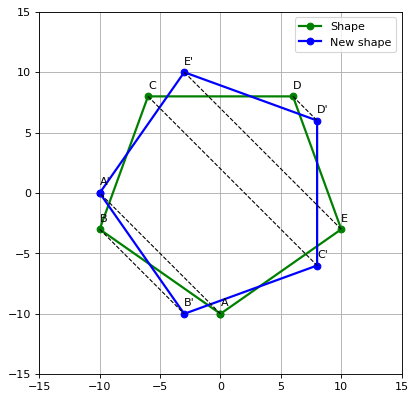

In [16]:
print_shape(shape, new_shape)

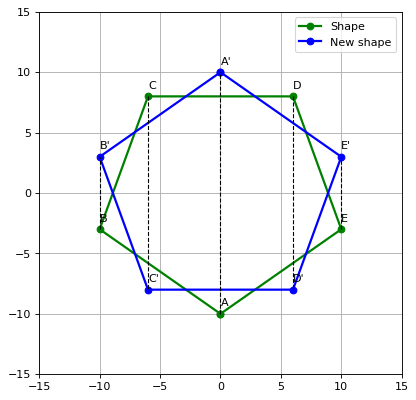

In [17]:
new_shape = reflect(shape, 'x')
print_shape(shape, new_shape)

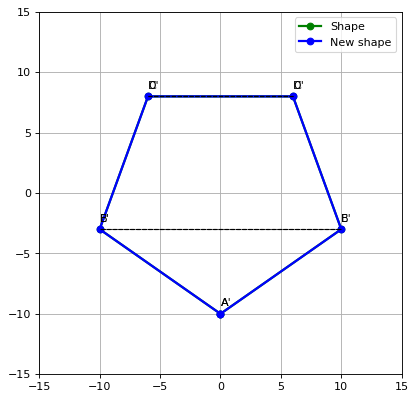

In [18]:
new_shape = reflect(shape, 'y')
print_shape(shape, new_shape)

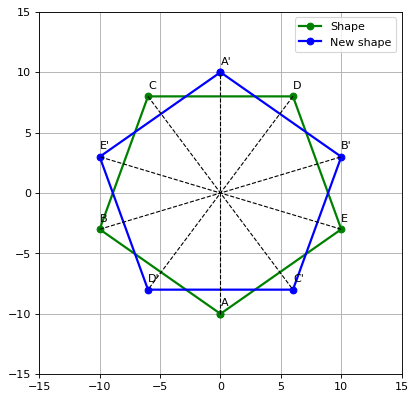

In [19]:
new_shape = reflect(shape, 'zero')
print_shape(shape, new_shape)